In [1]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\saxen\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


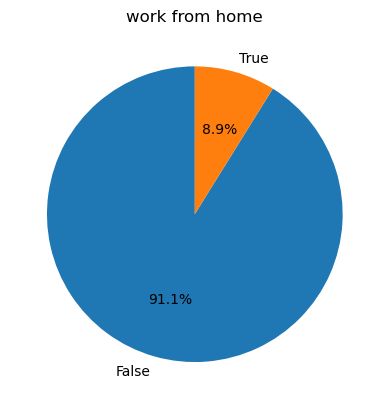

In [ ]:
#lets count the no of times each job_work_from_home has appeared and plot a pie chart , here autopct tellsus how much is true and false in numbers %1.1f gives a decimal floating point number
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('work from home')
plt.ylabel('')
plt.show()

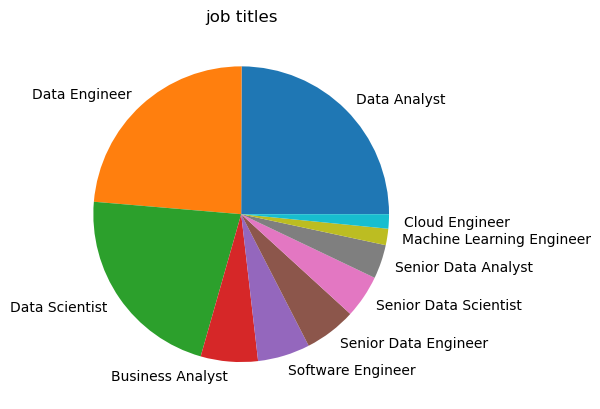

In [4]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('job titles')
plt.ylabel('')
plt.show()

In [8]:
 #now well access those columns which gives us a boolean value
 df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


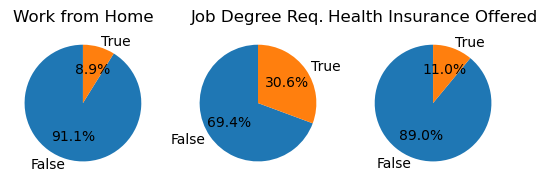

In [ ]:
#now we are going to create a subplot which will show pie chart in it
#subplot=>all three charts can be viewed together on one single plot
#1 row mein 3 columns means 3 charts in 1 row
fig, ax=plt.subplots(1,3)
#first we are going to plot just one and then build up on it

#im applying the matplotlib function here by accessing the job_work_from home col and counting the no of times it appeared
#ax.pie(df['job_work_from_home'].value_counts())
#plt.show()

#but we want to display alll 3 so instead of writing this code 3 times we can do this by for loop

dict_column={
    #when we call out the key we want the values to be displayed on the header for each
    #column:title(key:value)
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}
#i is the index that will be displayed and then iterator is a tuple which contains column and title
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()
